<a href="https://colab.research.google.com/github/Rafa516/Wallmart-Inc/blob/master/MiniProjeto_RoofImoveis_RID37828.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
> Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro 
e quer expandir sua área de atuação fazendo um investimento internacional. A empresa irá investir em imóveis no Condado de County, nos Estados Unidos, com isso será feito to um processo de levantamento para verificar algumas particularidades de imóveis para um bom negóco.



#1.0 A questão do negócio

> A meta desse projeto é identificar quais imóveis tem um potencial maior para investimento para que haja um retorno plausível e sem perdas a longo prazo, localizar também locais e imóveis que não terão um retorno viável de investimento.
A coleta dessas informações foi realizada através de um conjunto de dados disponibilizados no [kagle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download).

    

#2.0 Entendimento do negócio
> Através dos dados disponibilizados no [kagle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download) foi possível fazer um levantamento, mapeamento e  filtragem, para solucionar a questão em si em cima do negócio pautado, pois contém o preço de venda, entre outras variáveis, das casas nos meados de 2014 e 2015, bem relevantes para avaliaçao um modelo de regressão na área do setor imobiliário.

#3.0 Coleta de dados
> Nessa etapa foi realizado a importação do arquivo csv para realizar o tratamento dos dados da melhor maneira possível 

###Descrição dos dados
> **date:** data de venda  
**price:** preço de venda  
**bedrooms:** número de quartos  
**bathrooms:** número de banheiros  
**sqft_living:** tamanho da área habitacional em pés²  
**sqft_lot:** tamanho do lote em pés²  
**floors:** número de andares  
**waterfront: ‘1’ se a propriedade for à beira-mar, ‘0’ se não.**  
**view:** um índice de 0 a 4 do quão bom é a visão da propriedade (imagine 0 para uma propriedade com visão para um beco sujo e 4 para uma propriedade com visão para um lindo parque)  
**condition:** condição da casa, com valores de 1 até 5
grade: classificação pela qualidade do material da casa. Construções com melhores materiais normalmente custam mais caro  
**sqft_above:** pés² acima do solo  
**sqft_basement:** pés² abaixo do solo  
**yr_built:** ano de construção  
**yr_renovated:** ano de renovação. ‘0’ se nunca foi renovada  
**zipcode:** código zip de 5 dígitos  
**lat, long:** latitude e longitude  
**squft_livng15:** tamanho médio das 15 casas mais próximas, em pés²  
**sqft_lot15:** tamanho médio dos lotes das 15 casas mais próximas, em pés²  


## Importação das bibliotecas utilizadas 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##Tranformando o arquivo  CSV em um dataframe para melhor vizualização das colunas

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Rafa516/RoofImoveis/master/kc_house_data.csv', parse_dates=['date', 'yr_built'],decimal='.')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Conferindo o Tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  datetime64[ns]
 15  yr_renovated   2161

##Encontrando a cidade de cada Imóvel

In [ ]:
#Criando uma nova coluna vazia para cidade
df['City'] = np.nan

In [ ]:
# Encontrando a cidade de cada imóvel
! pip install uszipcode
from uszipcode import SearchEngine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 12.3 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 45 kB 4.6 MB/s 
     |████████████████████████████████| 41 kB 509 kB/s 


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
#Preenchendo a coluna City usando o SearchEngine do uszipcode
engine = SearchEngine()
for index, row in df.iterrows():
  zipcode = engine.by_zipcode(df['zipcode'][index])
  df['City'][index] = zipcode.major_city

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Conferindo se a coluna City foi preenchida
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503,Sammamish


#4.0 Removendo Outliers

Foi realizada a remoção e vizualização dos outliers que são dados que se diferenciam drasticamente de todos os outros.

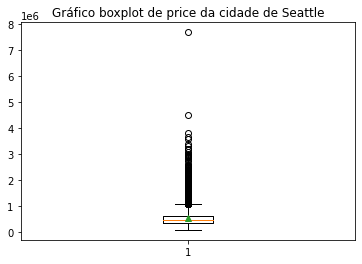

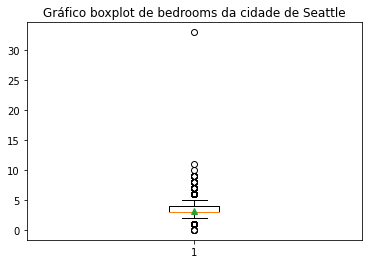

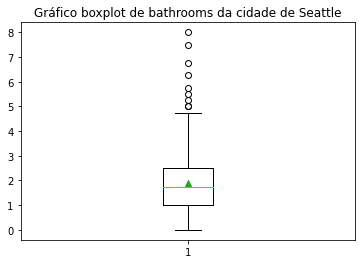

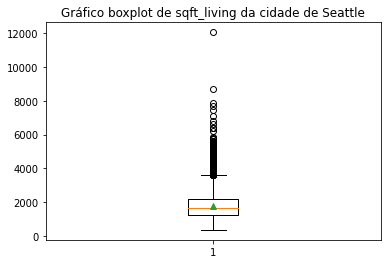

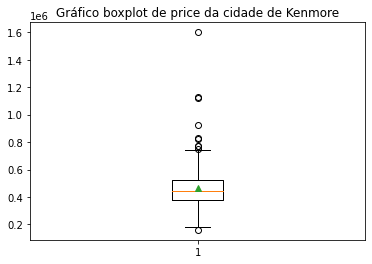

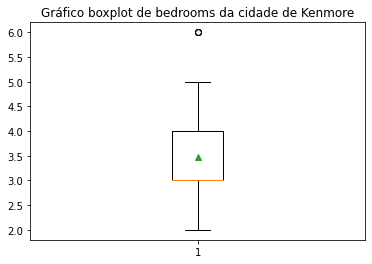

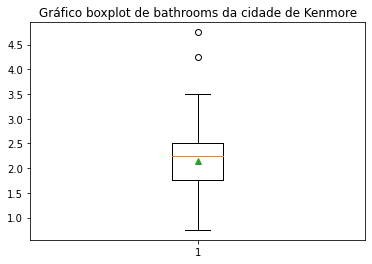

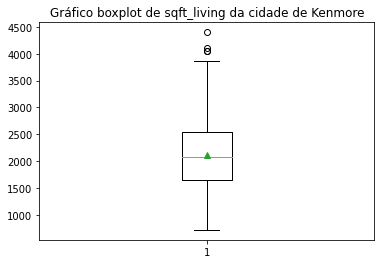

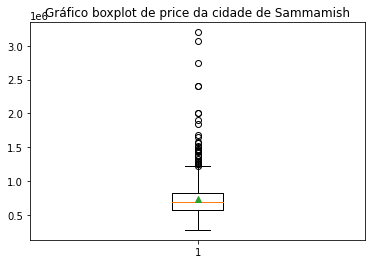

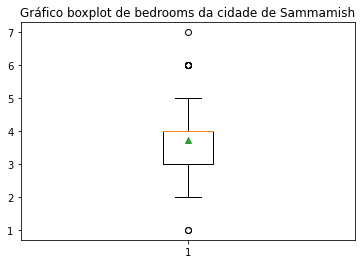

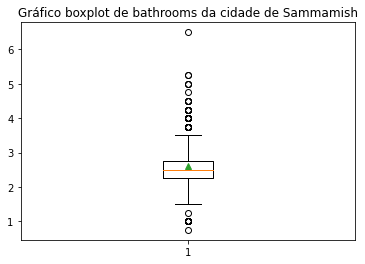

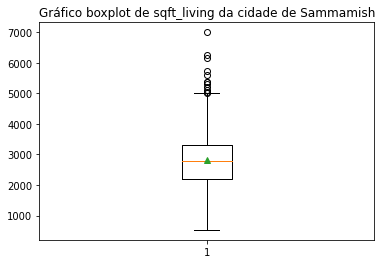

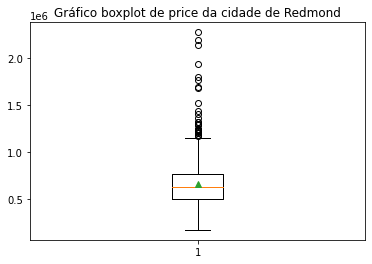

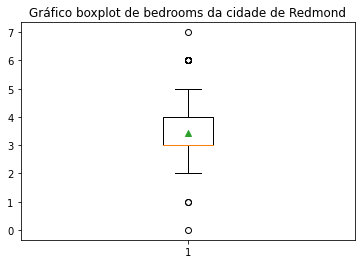

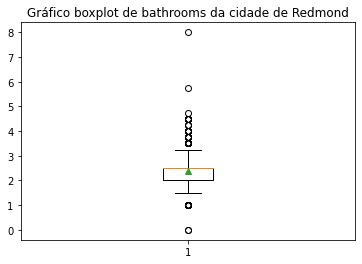

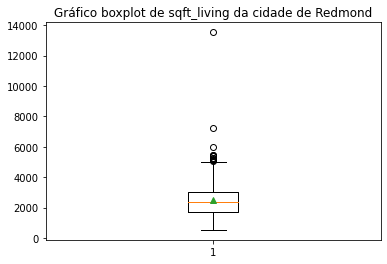

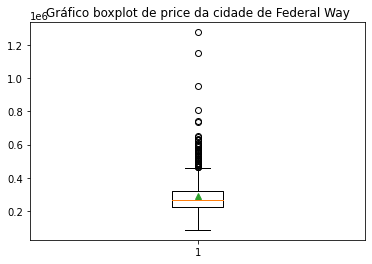

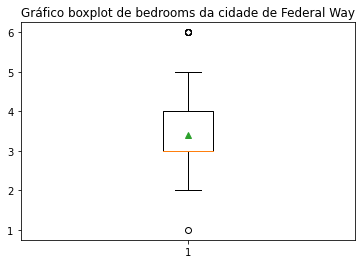

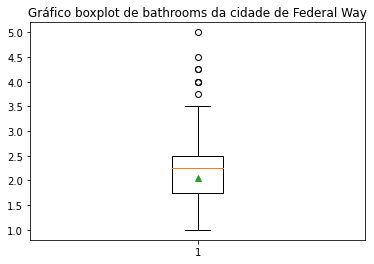

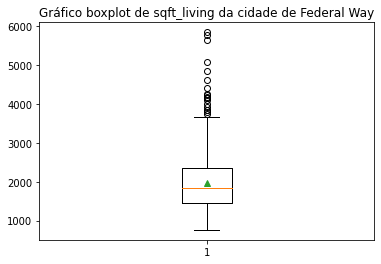

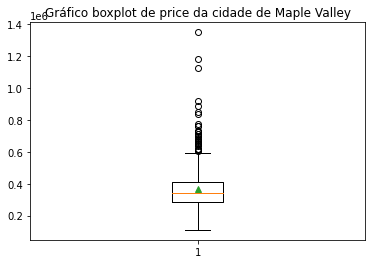

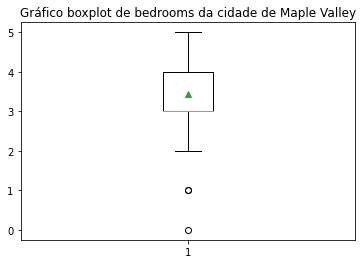

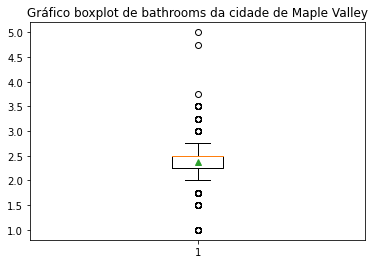

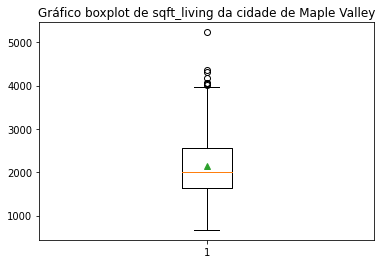

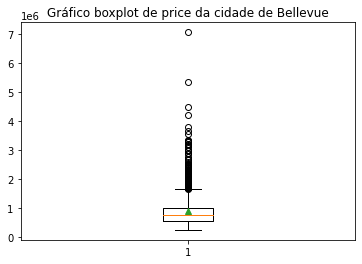

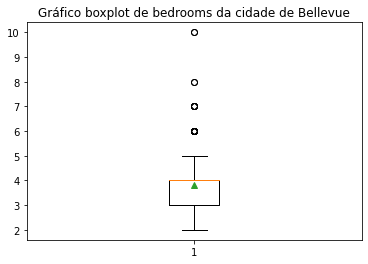

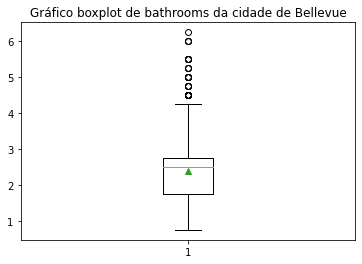

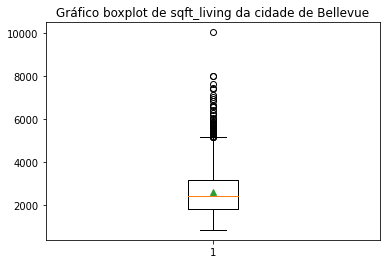

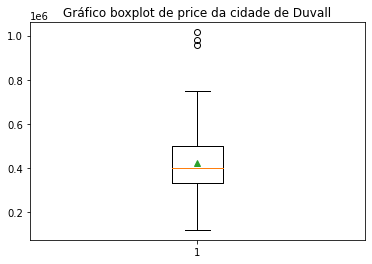

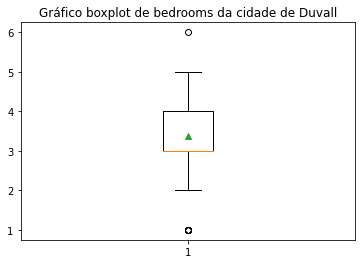

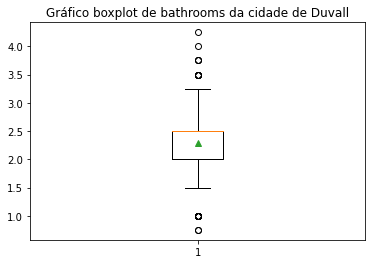

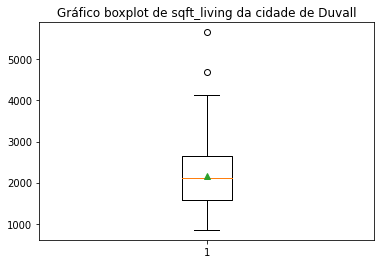

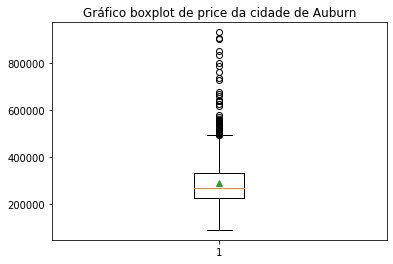

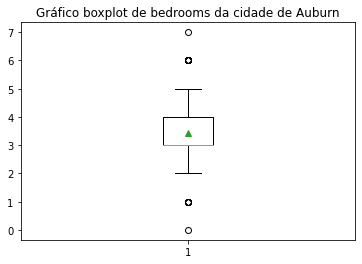

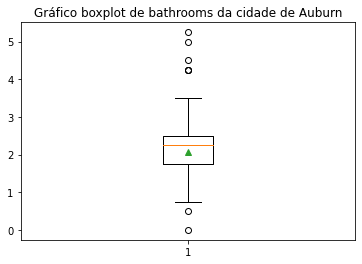

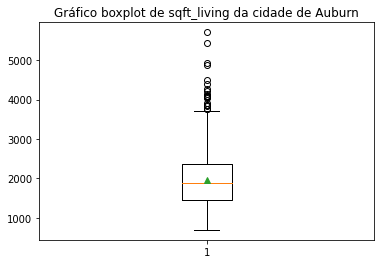

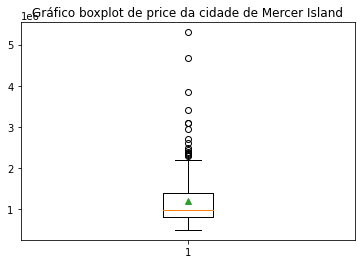

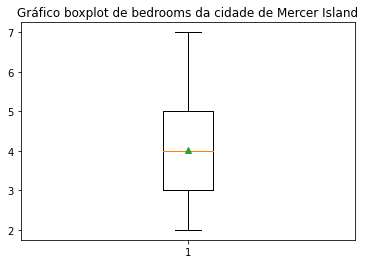

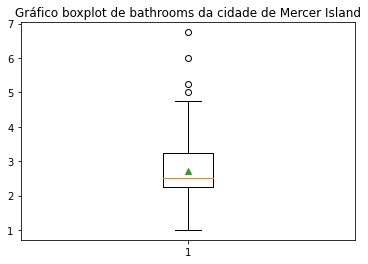

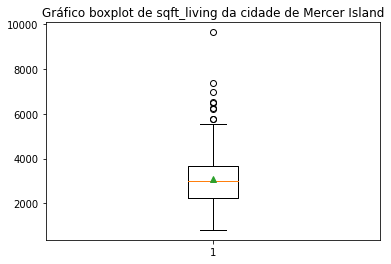

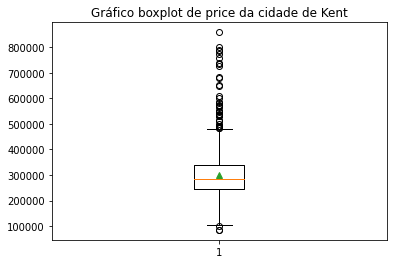

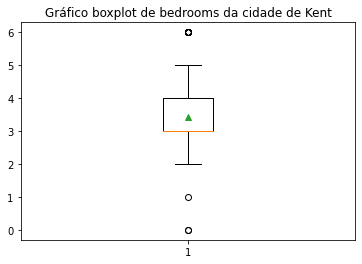

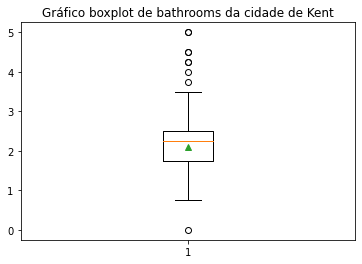

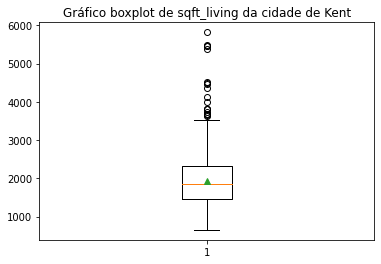

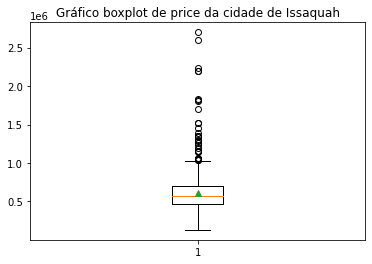

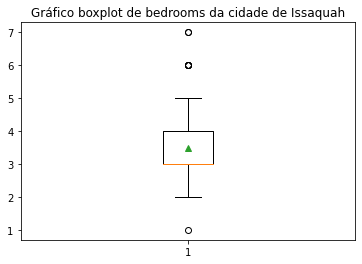

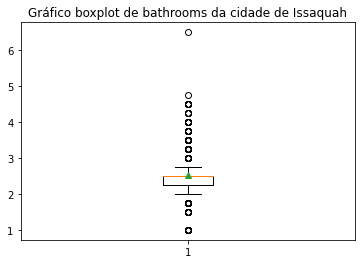

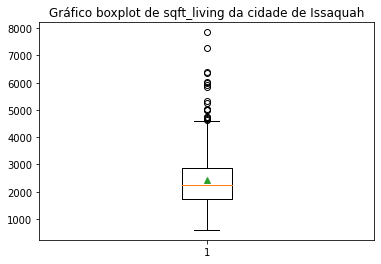

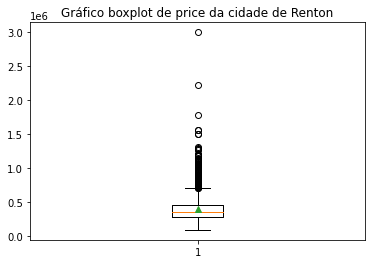

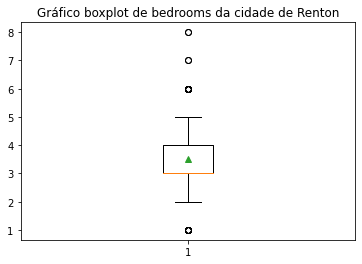

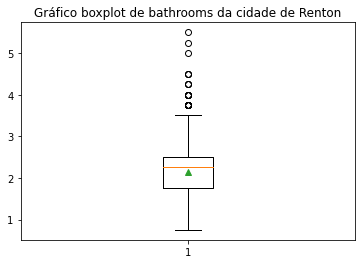

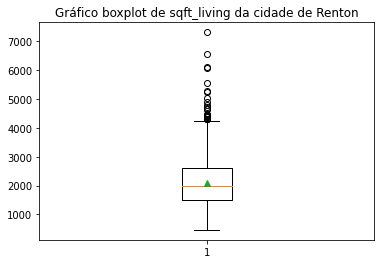

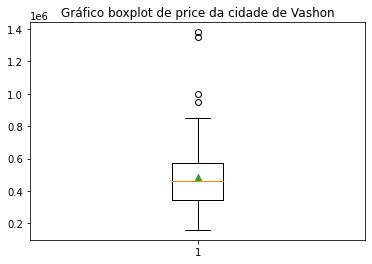

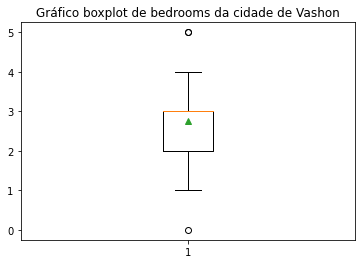

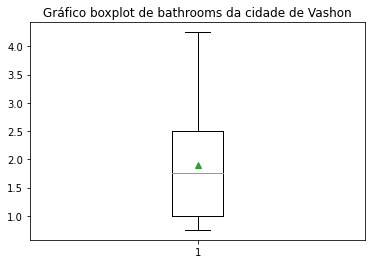

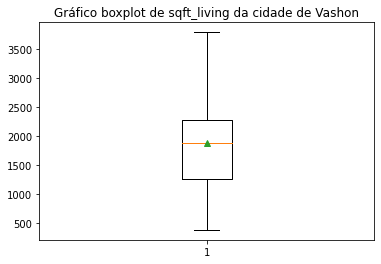

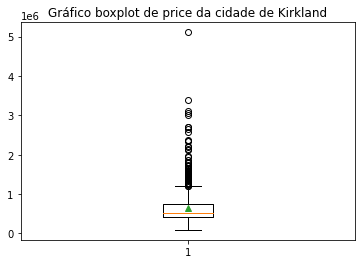

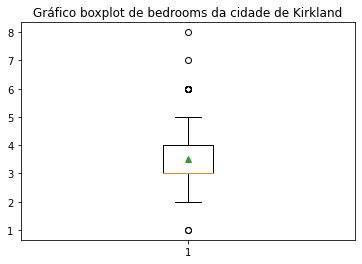

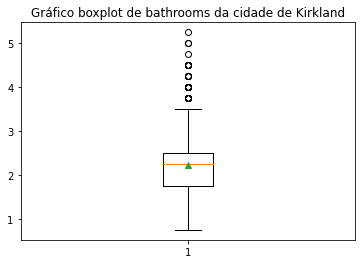

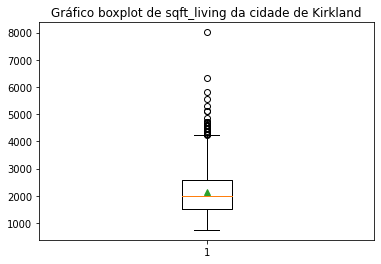

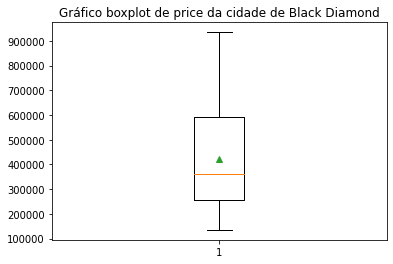

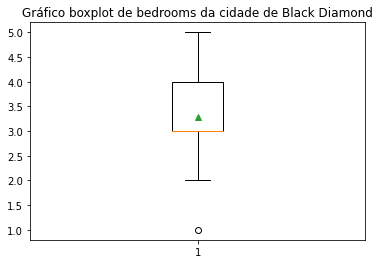

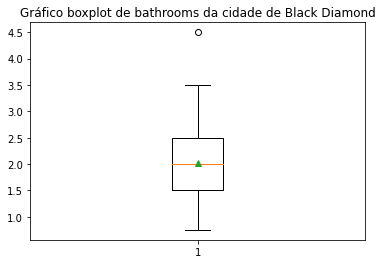

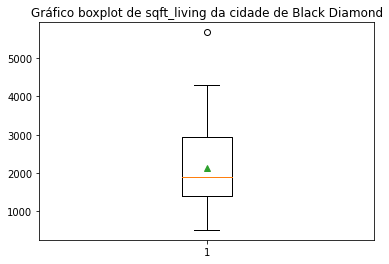

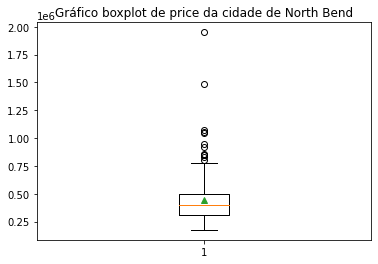

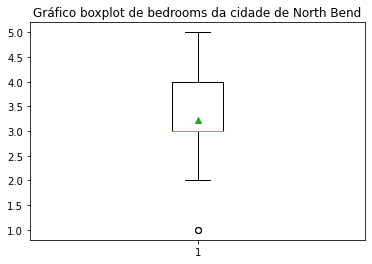

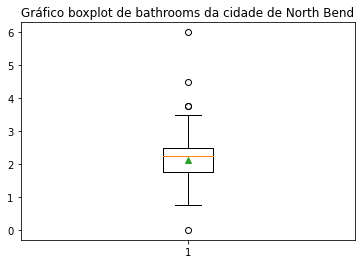

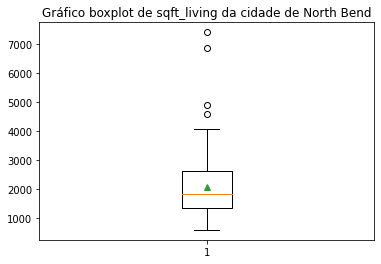

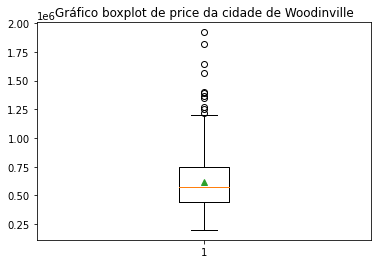

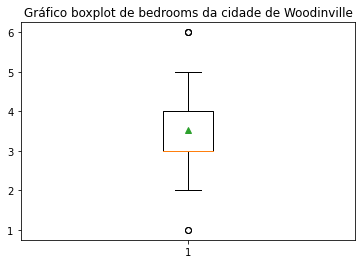

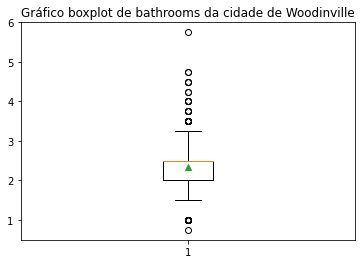

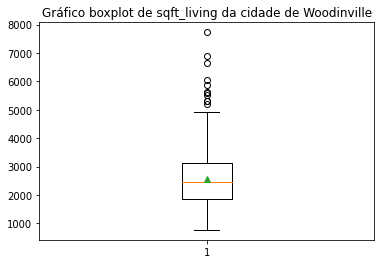

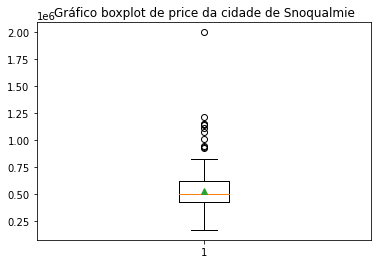

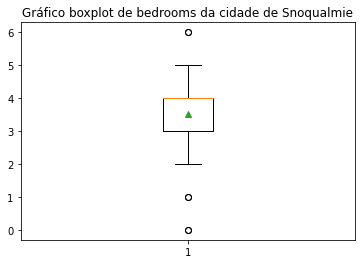

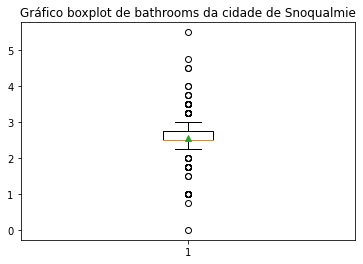

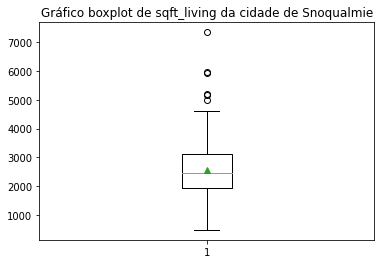

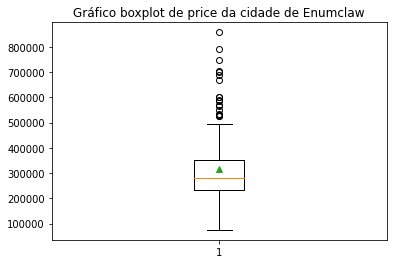

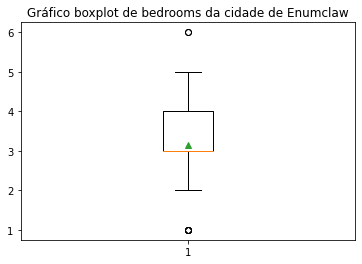

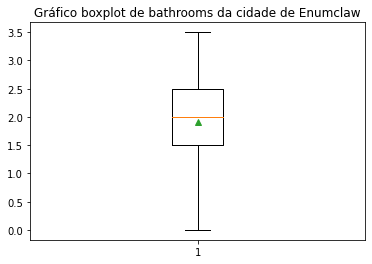

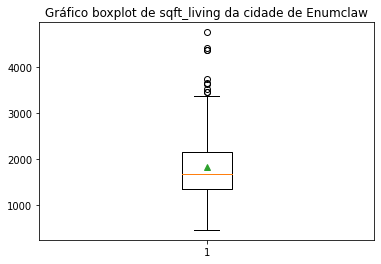

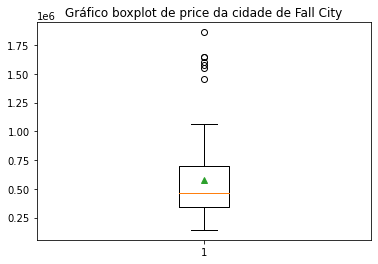

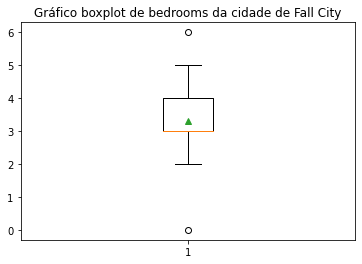

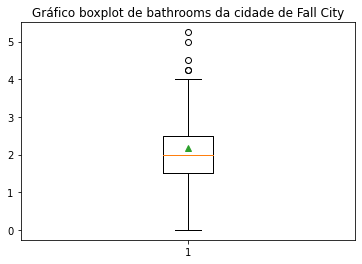

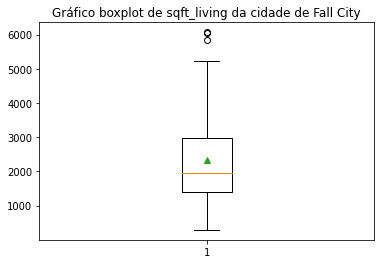

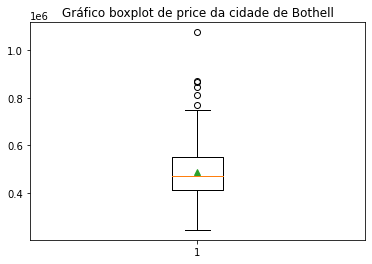

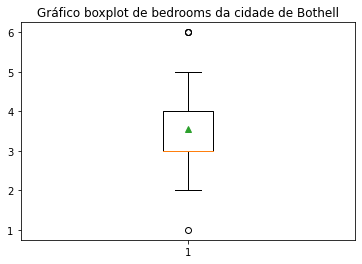

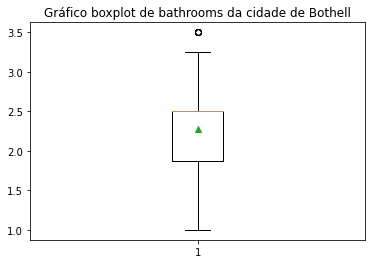

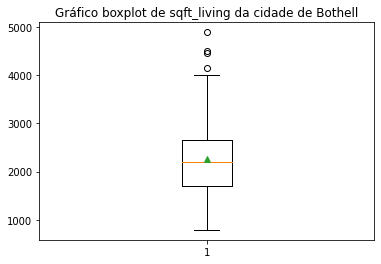

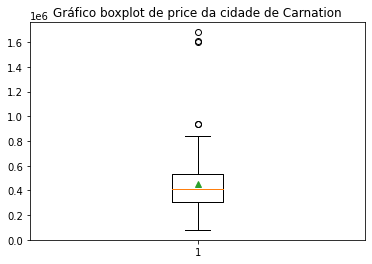

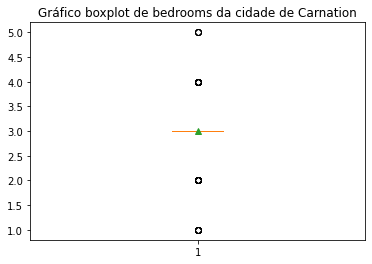

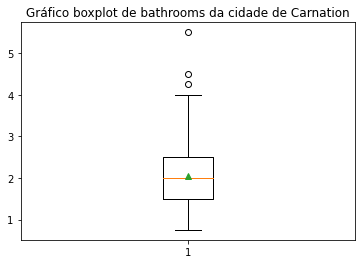

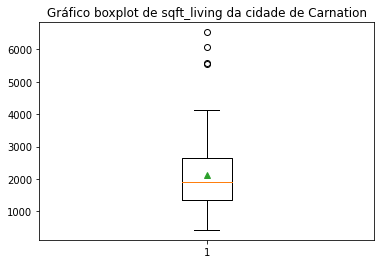

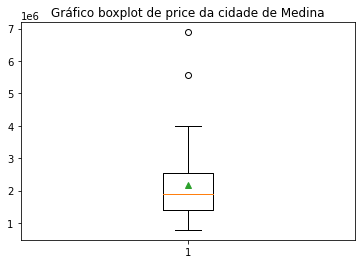

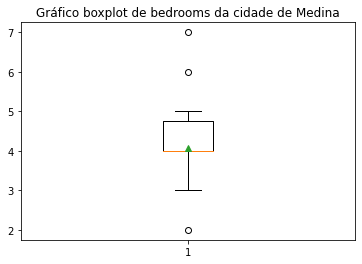

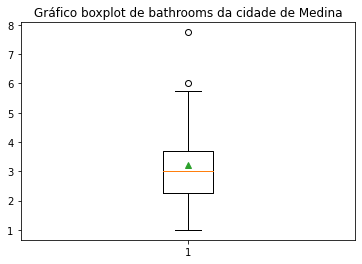

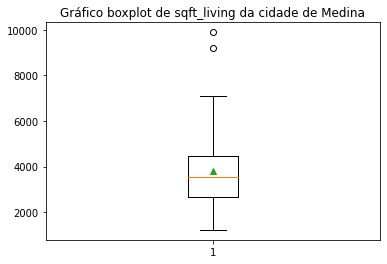

In [ ]:
for a in range(len(df['City'].unique())):
  for b in ['price', 'bedrooms', 'bathrooms', 'sqft_living']:
    plt.boxplot(df[df['City'] == df['City'].unique()[a]][b].values, showmeans=True)
    plt.title(f"Gráfico boxplot de {b} da cidade de {df['City'].unique()[a]}")
    print()
    plt.show()

In [ ]:
df_outliers = df.copy()
for a in range(len(df['City'].unique())):
  for b in ['price', 'bedrooms', 'bathrooms', 'sqft_living']:
    Q75 = df_outliers[b].quantile(0.75)
    Q25 = df_outliers[b].quantile(0.25)
    IIQ = Q75 - Q25
    limite_sup = Q75 + 1.5 * IIQ
    limite_inf = Q25 - 1.5 * IIQ
    df_outliers = df_outliers[(df_outliers[b] > limite_inf) & (df_outliers[b] < limite_sup)]

In [ ]:
df_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009-01-01,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014-01-01,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009-01-01,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004-01-01,0,98027,47.5345,-122.069,1410,1287,Issaquah


#5.0 Exploração dos dados

##Verificando o percentual de imóveis por cidade. 
> **Primeiro insight:** a grande maioria dos imóveis está localizada em Seattle, Renton, Bellevue, Kent, Redmond, Kirland e Auburn (>70%).

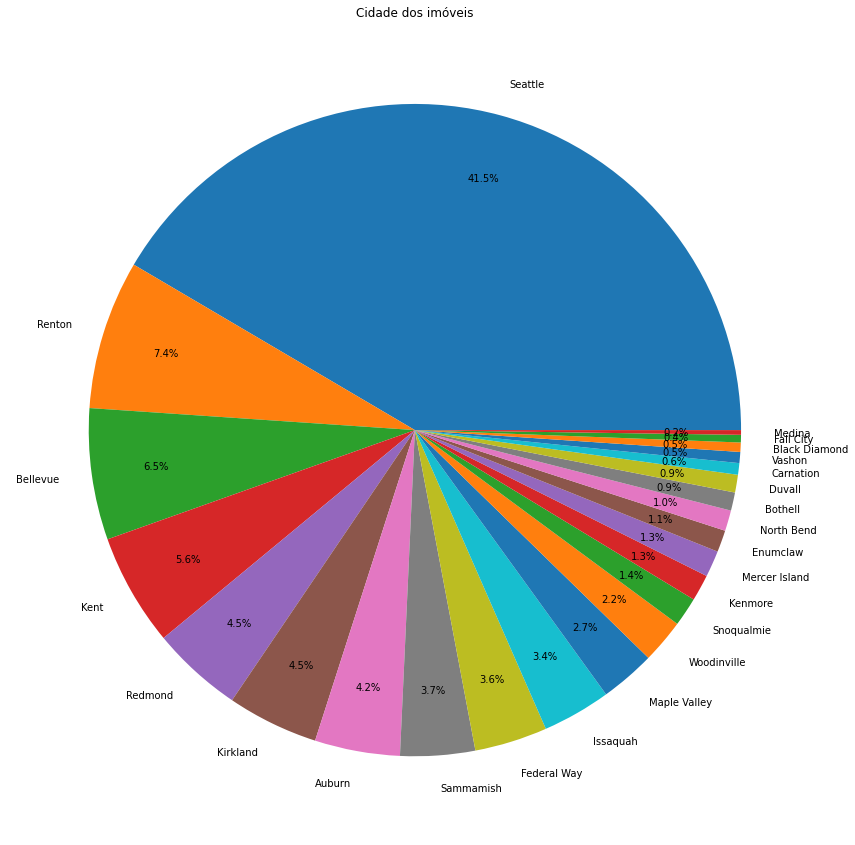

In [ ]:
figura = plt.figure(figsize=(15, 15))
plt.title('Cidade dos imóveis')
plt.pie(df['City'].value_counts(), labels=df['City'].value_counts().index, autopct='%.1f%%', pctdistance=.8)
plt.show()

In [ ]:
# Criando e preenchendo a coluna preço por área habitável

for index, row in df.iterrows():
  df['Price_squareft'] = df['price']/df['sqft_living']

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955-01-01,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951-01-01,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933-01-01,0,98028,47.7379,-122.233,2720,8062,Kenmore,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965-01-01,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987-01-01,0,98074,47.6168,-122.045,1800,7503,Sammamish,303.571429


##Conferindo maiores e menores preço/ft²

In [ ]:
df_cheapest = df.sort_values(by=['Price_squareft'])
df_cheapest.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
18262,2891000610,2014-12-11,148900.0,4,1.75,1700,6000,1.0,0,0,...,0,1967-01-01,0,98002,47.3252,-122.208,1280,6000,Auburn,87.588235
3785,723049156,2014-05-23,149000.0,3,1.00,1700,8645,1.0,0,0,...,0,1955-01-01,0,98146,47.4899,-122.337,1500,7980,Seattle,87.647059
13825,5637200450,2014-10-17,257000.0,5,2.75,2930,10148,2.0,0,0,...,0,2002-01-01,0,98059,47.4887,-122.145,2930,8425,Renton,87.713311
17197,5111400086,2014-05-12,110000.0,3,1.00,1250,53143,1.0,0,0,...,0,1945-01-01,0,98038,47.4235,-122.051,1820,217800,Maple Valley,88.000000
1385,3342700465,2015-01-23,250000.0,3,1.50,2840,10182,1.0,0,0,...,1330,1951-01-01,0,98056,47.5240,-122.200,2210,9669,Renton,88.028169
6523,8661000089,2014-07-16,199950.0,3,2.75,2270,13590,1.5,0,0,...,970,1948-01-01,0,98022,47.2099,-122.001,1160,13545,Enumclaw,88.083700
14993,4222310010,2014-12-26,152500.0,4,1.00,1730,7350,1.5,0,0,...,0,1970-01-01,0,98003,47.3467,-122.307,1440,7752,Federal Way,88.150289
12185,7686202065,2014-07-23,170000.0,4,1.75,1920,7500,1.0,0,0,...,0,1962-01-01,0,98198,47.4222,-122.318,1490,8000,Seattle,88.541667
8200,5379804470,2014-06-17,170000.0,4,1.00,1920,13787,1.0,0,0,...,700,1966-01-01,0,98188,47.4502,-122.277,1490,11200,Seattle,88.541667
18590,2154900040,2014-10-30,194250.0,3,2.25,2190,8834,1.0,0,0,...,800,1987-01-01,0,98001,47.2633,-122.244,1490,8766,Auburn,88.698630


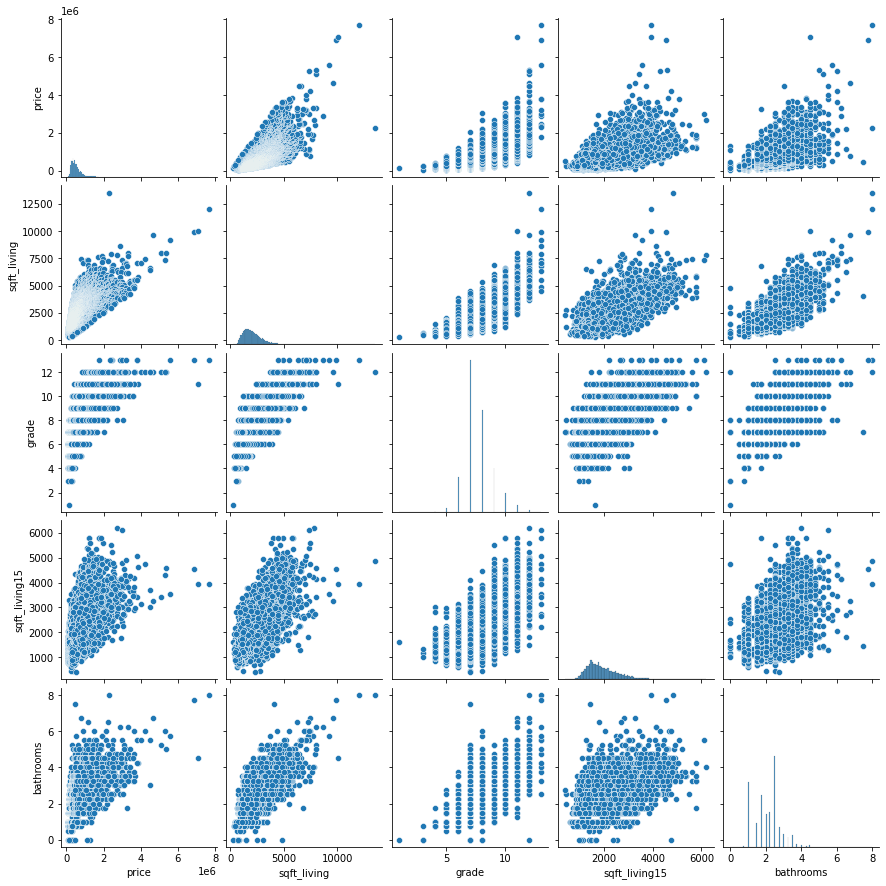

In [ ]:
sns.pairplot(df_cheapest[['price', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']])
plt.show()

In [ ]:
df_priciest = df.sort_values(by=['Price_squareft'], ascending=False)

In [ ]:
df_priciest.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
19336,6021500970,2015-04-07,874950.0,2,1.00,1080,4000,1.0,0,0,...,0,1940-01-01,0,98117,47.6902,-122.387,1530,4240,Seattle,810.138889
4013,724069059,2014-05-09,2400000.0,3,2.25,3000,11665,1.5,1,4,...,0,2001-01-01,0,98075,47.5884,-122.086,3000,15959,Sammamish,800.000000
10446,1118000320,2015-05-08,3400000.0,4,4.00,4260,11765,2.0,0,0,...,980,1939-01-01,2010,98112,47.6380,-122.288,4260,10408,Seattle,798.122066
8623,6303400395,2015-01-30,325000.0,1,0.75,410,8636,1.0,0,0,...,0,1953-01-01,0,98146,47.5077,-122.357,1190,8636,Seattle,792.682927
9314,4389200610,2014-12-01,903000.0,2,1.50,1140,7800,1.0,0,0,...,0,1947-01-01,0,98004,47.6142,-122.209,2020,7800,Bellevue,792.105263
18597,3222049087,2015-04-22,570000.0,1,1.00,720,7540,1.0,1,4,...,0,1905-01-01,0,98198,47.3509,-122.323,1120,9736,Seattle,791.666667
7313,4131900066,2014-08-25,3100000.0,3,3.00,3920,13085,2.0,1,4,...,0,1996-01-01,0,98040,47.5716,-122.204,3450,13287,Mercer Island,790.816327
6243,5536100010,2015-02-04,1050000.0,4,1.00,1330,9729,1.0,0,0,...,0,1952-01-01,0,98004,47.6223,-122.208,2920,10353,Bellevue,789.473684
12757,2767603026,2015-04-15,425000.0,2,1.00,540,2500,1.0,0,0,...,0,1905-01-01,0,98107,47.6729,-122.383,1290,5000,Seattle,787.037037
18876,9808700025,2015-02-11,1500000.0,3,1.50,1910,21374,1.0,0,0,...,0,1955-01-01,0,98004,47.6453,-122.214,2850,16167,Bellevue,785.340314


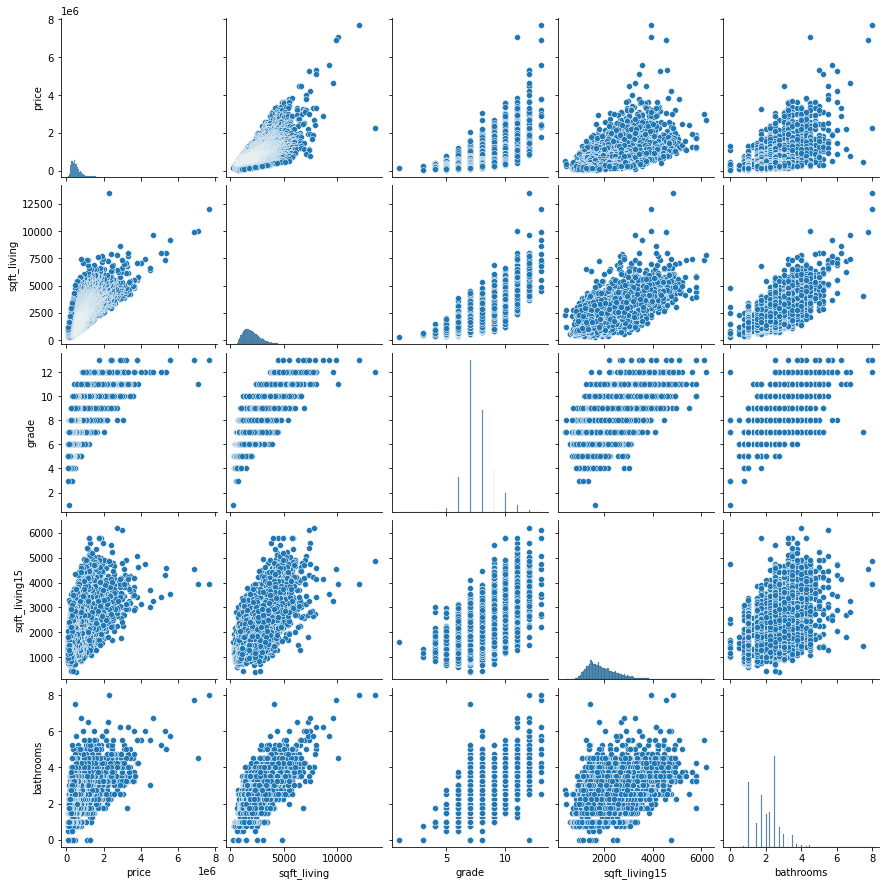

In [ ]:
sns.pairplot(df_priciest[['price', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']])
plt.show()

> Levando em consideração apenas o preço por área habitável, tem-se os melhores e piores imóveis.

##Calculando ganho/perda de investimento em imóveis que foram vendidos mais de uma vez

In [ ]:
dp = df[df.duplicated(['id'], keep=False)].sort_values(by='id')
dp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
2497,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991-01-01,0,98002,47.3262,-122.214,2060,7316,Auburn,125.000000
2496,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991-01-01,0,98002,47.3262,-122.214,2060,7316,Auburn,116.666667
16814,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0,0,...,0,1925-01-01,0,98055,47.4840,-122.211,1480,6969,Renton,178.571429
16815,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0,0,...,0,1925-01-01,0,98055,47.4840,-122.211,1480,6969,Renton,208.333333
11434,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0,0,...,0,1980-01-01,0,98023,47.2977,-122.367,1830,6956,Federal Way,168.918919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,2014-06-27,260000.0,2,1.00,700,4800,1.0,0,0,...,0,1922-01-01,0,98122,47.6147,-122.300,1440,4800,Seattle,371.428571
15200,9834200305,2015-02-10,615000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904-01-01,0,98144,47.5750,-122.288,1360,4080,Seattle,343.575419
15199,9834200305,2014-07-16,350000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904-01-01,0,98144,47.5750,-122.288,1360,4080,Seattle,195.530726
1085,9834200885,2014-07-17,360000.0,4,2.50,2080,4080,1.0,0,0,...,1040,1962-01-01,0,98144,47.5720,-122.290,1340,4080,Seattle,173.076923


In [ ]:
dups = df[df.id.duplicated(keep=False)]
duplicados = dups.groupby('id')['price'].apply(list)
print(duplicados.to_string()) #assim eu consegui uma série com todos os imóveis vendidos e o preço de venda

id
1000102                 [280000.0, 300000.0]
7200179                 [150000.0, 175000.0]
109200390               [245000.0, 250000.0]
123039336               [148000.0, 244900.0]
251300110               [225000.0, 358000.0]
302000375               [169100.0, 250000.0]
324000530               [201500.0, 459000.0]
526059224               [260000.0, 470000.0]
641900050               [335000.0, 499950.0]
643300040               [481000.0, 719521.0]
705730280               [325000.0, 335000.0]
722039087               [220500.0, 329000.0]
723049156               [149000.0, 284700.0]
726049190               [287500.0, 431000.0]
795000620     [115000.0, 124000.0, 157000.0]
937000330               [157000.0, 246500.0]
1036400200              [661000.0, 697000.0]
1139600270              [300000.0, 310000.0]
1217000340              [185000.0, 340000.0]
1219000473              [164950.0, 371000.0]
1231000510              [263000.0, 510000.0]
1232000810              [340000.0, 537000.0]
1237500

In [ ]:
#transformando a serie em dataframe
duplicados.to_frame(name='price') 
duplicadostabela = pd.DataFrame({'id':duplicados.index, 'price':duplicados.values})
duplicadostabela.at[14, 'price'] = [115000.0, 157000.0] #esse imóvel foi o único vendido 3 vezes, atualizando para não dar erro nos próximos passos
duplicadostabela.head(16)

,id,price
0,1000102,"[280000.0, 300000.0]"
1,7200179,"[150000.0, 175000.0]"
2,109200390,"[245000.0, 250000.0]"
3,123039336,"[148000.0, 244900.0]"
4,251300110,"[225000.0, 358000.0]"
5,302000375,"[169100.0, 250000.0]"
6,324000530,"[201500.0, 459000.0]"
7,526059224,"[260000.0, 470000.0]"
8,641900050,"[335000.0, 499950.0]"
9,643300040,"[481000.0, 719521.0]"


In [ ]:
#slicing da coluna preços
split_price = pd.DataFrame(duplicadostabela['price'].tolist(), columns=['venda_1', 'venda_2'])
split_price

,venda_1,venda_2
0,280000.0,300000.0
1,150000.0,175000.0
2,245000.0,250000.0
3,148000.0,244900.0
4,225000.0,358000.0
...,...,...
171,195000.0,322000.0
172,1895000.0,1940000.0
173,260000.0,430000.0
174,350000.0,615000.0


In [ ]:
#Juntando os dois dataframes resultantes
duplicadostabela = pd.concat([duplicadostabela, split_price], axis=1)
duplicadostabela

,id,price,venda_1,venda_2
0,1000102,"[280000.0, 300000.0]",280000.0,300000.0
1,7200179,"[150000.0, 175000.0]",150000.0,175000.0
2,109200390,"[245000.0, 250000.0]",245000.0,250000.0
3,123039336,"[148000.0, 244900.0]",148000.0,244900.0
4,251300110,"[225000.0, 358000.0]",225000.0,358000.0
...,...,...,...,...
171,9407110710,"[195000.0, 322000.0]",195000.0,322000.0
172,9809000020,"[1895000.0, 1940000.0]",1895000.0,1940000.0
173,9828200460,"[260000.0, 430000.0]",260000.0,430000.0
174,9834200305,"[350000.0, 615000.0]",350000.0,615000.0


In [ ]:
#dropando a price com ambos os valores
duplicadostabela = duplicadostabela.drop('price', axis=1)
duplicadostabela

,id,venda_1,venda_2
0,1000102,280000.0,300000.0
1,7200179,150000.0,175000.0
2,109200390,245000.0,250000.0
3,123039336,148000.0,244900.0
4,251300110,225000.0,358000.0
...,...,...,...
171,9407110710,195000.0,322000.0
172,9809000020,1895000.0,1940000.0
173,9828200460,260000.0,430000.0
174,9834200305,350000.0,615000.0


In [ ]:
duplicadostabela['lucro'] = duplicadostabela['venda_2'] - duplicadostabela['venda_1']
duplicadostabela

,id,venda_1,venda_2,lucro
0,1000102,280000.0,300000.0,20000.0
1,7200179,150000.0,175000.0,25000.0
2,109200390,245000.0,250000.0,5000.0
3,123039336,148000.0,244900.0,96900.0
4,251300110,225000.0,358000.0,133000.0
...,...,...,...,...
171,9407110710,195000.0,322000.0,127000.0
172,9809000020,1895000.0,1940000.0,45000.0
173,9828200460,260000.0,430000.0,170000.0
174,9834200305,350000.0,615000.0,265000.0


##Imóveis que mais deram lucro

In [ ]:
df_lucro = duplicadostabela.sort_values(by=['lucro'], ascending=False)
df_lucro.head()

,id,venda_1,venda_2,lucro
113,6021500970,345000.0,874950.0,529950.0
147,7977201065,350000.0,740000.0,390000.0
131,7409700215,550000.0,921500.0,371500.0
100,4443800385,410000.0,778100.0,368100.0
57,2568300045,305000.0,649950.0,344950.0


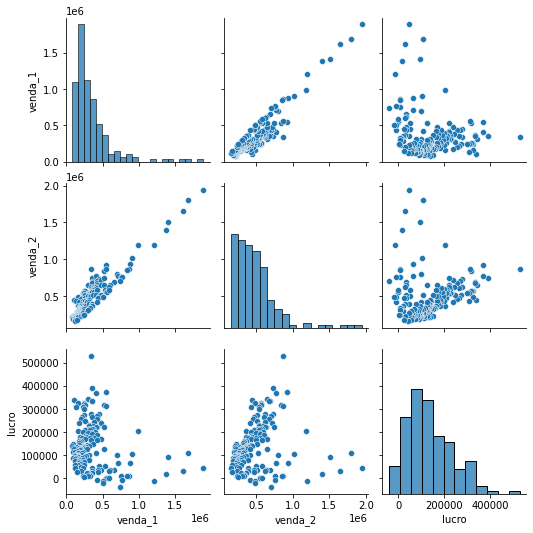

In [ ]:
sns.pairplot(df_lucro [['venda_1', 'venda_2', 'lucro']])
plt.show()

##Imóveis que mais deram prejuízo

In [ ]:
df_prejuizo = duplicadostabela.sort_values(by=['lucro'],ascending=True)
df_prejuizo

,id,venda_1,venda_2,lucro
127,7167000040,740000.0,700000.0,-40000.0
61,2726049071,510000.0,489950.0,-20050.0
88,4139420590,1212500.0,1200000.0,-12500.0
63,2767603612,500000.0,489000.0,-11000.0
159,8682262400,430000.0,419950.0,-10050.0
...,...,...,...,...
57,2568300045,305000.0,649950.0,344950.0
100,4443800385,410000.0,778100.0,368100.0
131,7409700215,550000.0,921500.0,371500.0
147,7977201065,350000.0,740000.0,390000.0
